# EXPLORING THE IMDB MOVIE DATASET


## Importing libraries and
## Reading the dataset.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
import datetime

df=pd.read_csv('imdb_movies.csv', encoding = 'unicode_escape')
df.head()


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama,Â Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction,Â Adventure,Â Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe SaldaÃ±a, Ney...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation,Â Adventure,Â Family,Â Fantasy,Â Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation,Â Comedy,Â Family,Â Adventure,Â Fantasy","Through a series of unfortunate events, three ...","Ãscar BarberÃ¡n, Thut (voice), Ana Esther Alb...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [3]:
df.columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

In [4]:
df['genre'].unique

<bound method Series.unique of 0                                           Drama,Â Action
1                     Science Fiction,Â Adventure,Â Action
2        Animation,Â Adventure,Â Family,Â Fantasy,Â Comedy
3        Animation,Â Comedy,Â Family,Â Adventure,Â Fantasy
4                                                   Action
                               ...                        
10173                                                Drama
10174                                               Action
10175                           Drama,Â Thriller,Â Romance
10176    Action,Â Adventure,Â Science Fiction,Â Thrille...
10177                         Animation,Â Family,Â Fantasy
Name: genre, Length: 10178, dtype: object>

In [5]:
df['genre'] = df['genre'].str.replace('Â',' ') 

In [6]:
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe SaldaÃ±a, Ney...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Ãscar BarberÃ¡n, Thut (voice), Ana Esther Alb...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


*Cleaning the dataset for further usage and EDA.*


In [7]:
df.columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

In [8]:
df.rename(columns = {'date_x' : 'date', 'budget_x': 'budget'}, inplace =True)
df.drop(columns = ['orig_title'], axis = 1, inplace = True)
df.columns

Index(['names', 'date', 'score', 'genre', 'overview', 'crew', 'status',
       'orig_lang', 'budget', 'revenue', 'country'],
      dtype='object')

In [9]:
df.isna().sum()

names         0
date          0
score         0
genre        85
overview      0
crew         56
status        0
orig_lang     0
budget        0
revenue       0
country       0
dtype: int64

In [10]:
df.dropna(inplace = True)

In [12]:
df.dtypes

names         object
date          object
score        float64
genre         object
overview      object
crew          object
status        object
orig_lang     object
budget       float64
revenue      float64
country       object
dtype: object

In [13]:
df['date'] = pd.to_datetime(df.date)

In [14]:
df.dtypes

names                object
date         datetime64[ns]
score               float64
genre                object
overview             object
crew                 object
status               object
orig_lang            object
budget              float64
revenue             float64
country              object
dtype: object

In [15]:
df.describe()

,date,score,budget,revenue
count,10052,10052.00000,1.005200e+04,1.005200e+04
mean,2008-06-07 16:17:25.762037504,63.82700,6.412528e+07,2.512049e+08
min,1903-05-15 00:00:00,0.00000,1.000000e+00,0.000000e+00
25%,2002-01-08 06:00:00,59.00000,1.439763e+07,2.768781e+07
50%,2013-04-10 00:00:00,65.00000,5.000000e+07,1.493288e+08
75%,2019-09-26 00:00:00,71.00000,1.040000e+08,4.161578e+08
max,2023-12-31 00:00:00,100.00000,4.600000e+08,2.923706e+09
std,NaN,12.78271,5.665852e+07,2.765495e+08


In [16]:
df.columns

Index(['names', 'date', 'score', 'genre', 'overview', 'crew', 'status',
       'orig_lang', 'budget', 'revenue', 'country'],
      dtype='object')

## Exploratory Data Analysis

### Top Movies Overall

Let's see which movies hava the highest rating according to the dataset.

,names,score
5482,Pinocchio,780.0
3983,King Kong,621.0
3123,Halloween,609.0
938,Beauty and the Beast,566.0
1553,Cinderella,540.0
7754,The Jungle Book,404.0
402,Alice in Wonderland,402.0
8464,The Ten Commandments,396.0
5937,Robin Hood,392.0
2981,Godzilla,390.0


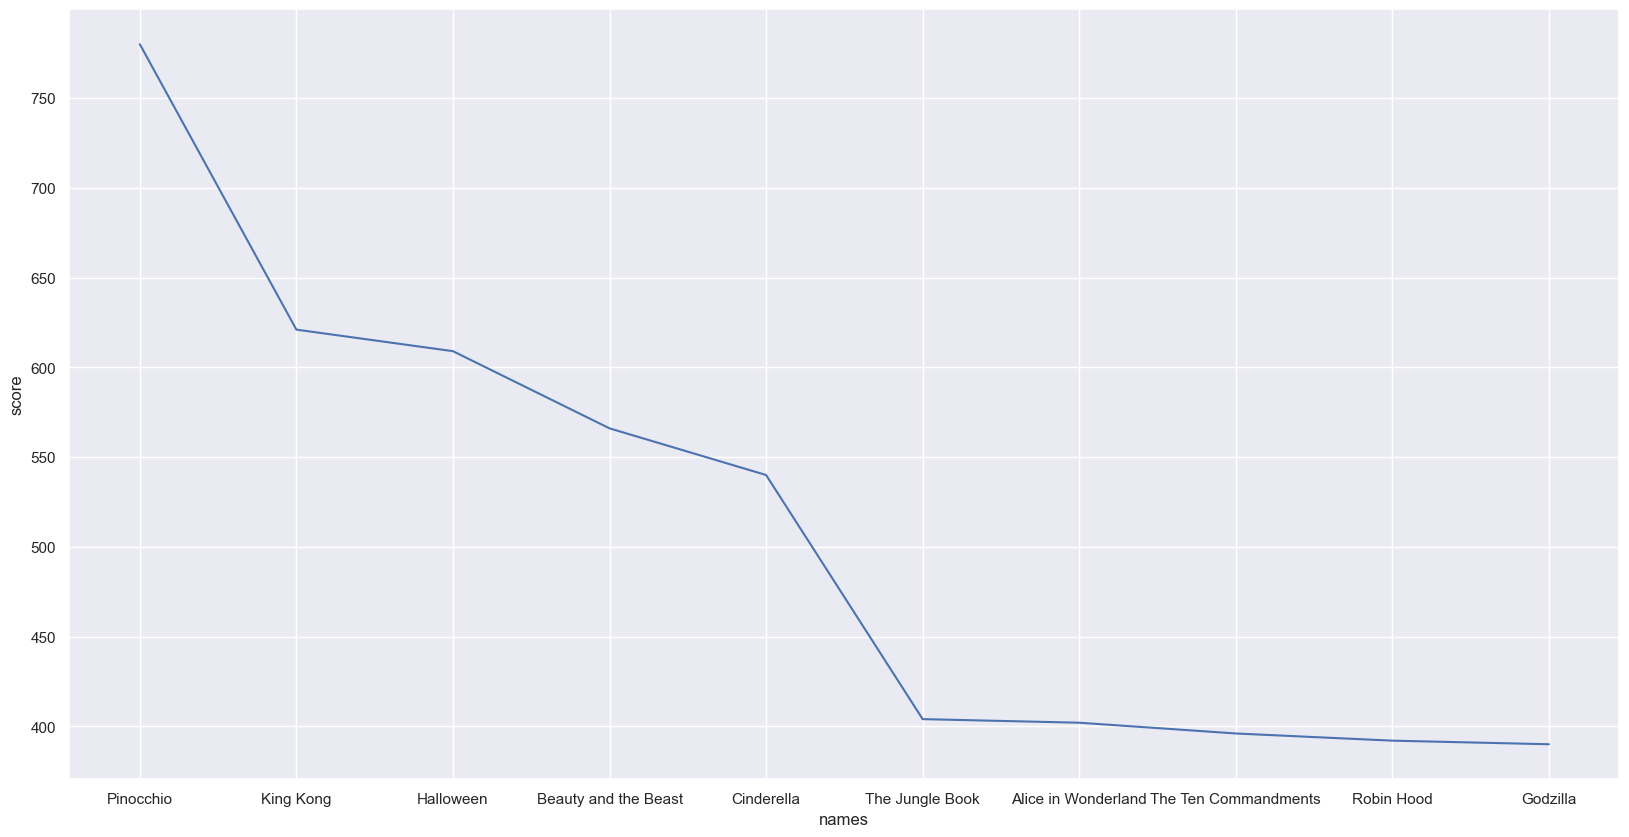

In [17]:
top = df.groupby('names', as_index = False)['score'].sum().sort_values(by = 'score',ascending = False)
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data = top.head(10) , x ='names' , y = 'score')
top.head(10)

* *The most popular movies are Pinocchio, King Kong , Halloween and so on.*

In [18]:
df.sort_values(by = ['genre' , 'score'], ascending  = [True , False])

,names,date,score,genre,overview,crew,status,orig_lang,budget,revenue,country
4686,Fist of Legend,1994-12-22,75.0,Action,"Chen Zhen, a Chinese engineering student in Ky...","Jet Li, Chen Zhen, Shinobu Nakayama, Mitsuko Y...",Released,Chinese,9265000.0,1907743.0,HK
3966,Enter the Dragon,1973-11-01,74.0,Action,A martial artist agrees to spy on a reclusive ...,"Bruce Lee, Lee, John Saxon, Roper, Jim Kelly, ...",Released,English,10000000.0,21485066.0,AU
530,The princess,2022-08-05,73.0,Action,"Refusing to marry a drug lord, Grecia is deter...","Fernando Ciangherotti, Ricardo, Palmeira Cruz,...",Released,"Spanish, Castilian",104400000.0,492717594.8,MX
5273,The Big Boss,1971-10-23,72.0,Action,Chen is a city boy who moves with his cousins ...,"Bruce Lee, Cheng Chiu On, Maria Yi, Chiao Mei,...",Released,Chinese,100000.0,117017287.6,HK
8551,Take Point,2018-12-26,71.0,Action,On the day of the U.S. presidential election i...,"Ha Jung-woo, Ahab, Lee Sun-kyun, Yoon Ji-eui, ...",Released,Korean,71800000.0,424382090.2,KR
...,...,...,...,...,...,...,...,...,...,...,...
7487,Bone Tomahawk,2015-10-23,68.0,"Western, Horror","During a shootout in a saloon, Sheriff Hunt in...","Kurt Russell, Sheriff Franklin Hunt, Patrick W...",Released,English,2000000.0,475846.0,US
136,Ghosts of the Ozarks,2022-02-04,63.0,"Western, Horror, Mystery","In 1866, a young doctor is summoned by his unc...","Thomas Hobson, James 'Doc' McCune, Tara Perry,...",Released,English,113000000.0,548624602.6,US
5458,Murder at Yellowstone City,2022-08-01,56.0,"Western, Mystery",A former slave who arrives in Yellowstone City...,"Gabriel Byrne, Sheriff Ambrose, Thomas Jane, T...",Released,English,111200000.0,278054690.6,AU
7491,Brimstone,2017-04-11,71.0,"Western, Mystery, Thriller, Drama",In the menacing inferno of the old North-Ameri...,"Guy Pearce, The Reverend, Dakota Fanning, Liz,...",Released,English,13000000.0,158013832.2,AU


### Most Popular Genres

,genre,score
1198,Drama,35377.0
898,Comedy,22205.0
1369,"Drama, Romance",16928.0
1728,Horror,14944.0
1822,"Horror, Thriller",11864.0
1058,"Comedy, Romance",11723.0
1182,Documentary,8505.0
963,"Comedy, Drama",7950.0
325,"Action, Thriller",7418.0
1952,"Romance, Drama",6477.0


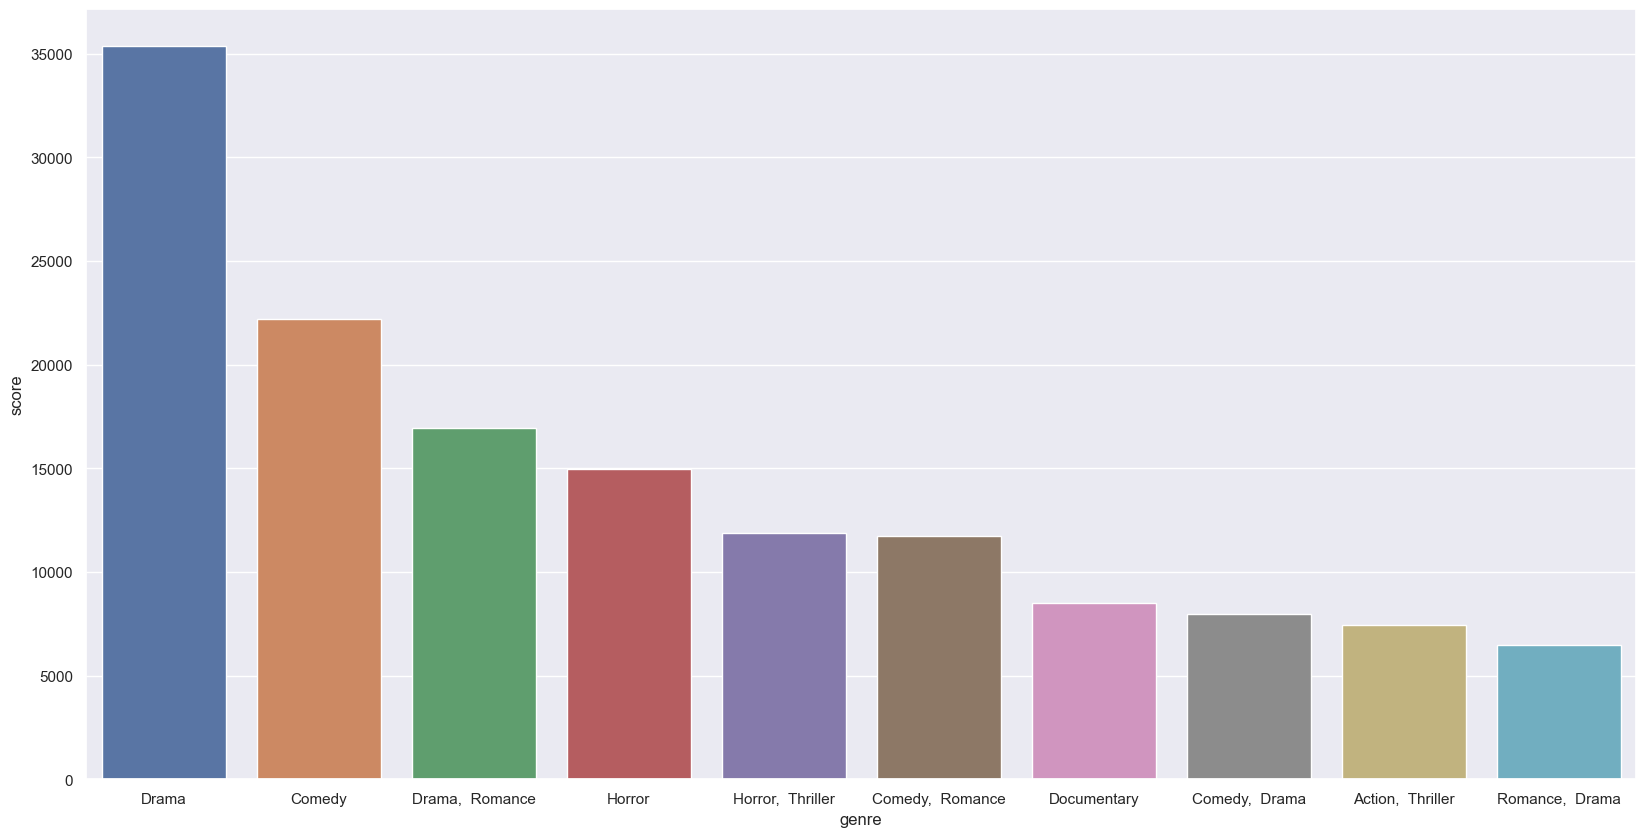

In [19]:
gen = df.groupby(['genre'],as_index = False)['score'].sum().sort_values(by = 'score', ascending = False)
sns.barplot(data = gen.head(10),x = 'genre',y = 'score' )
gen.head(10)

* *Thus, Drama is the most popular genre followed by Comedy and Drama/Romance.*

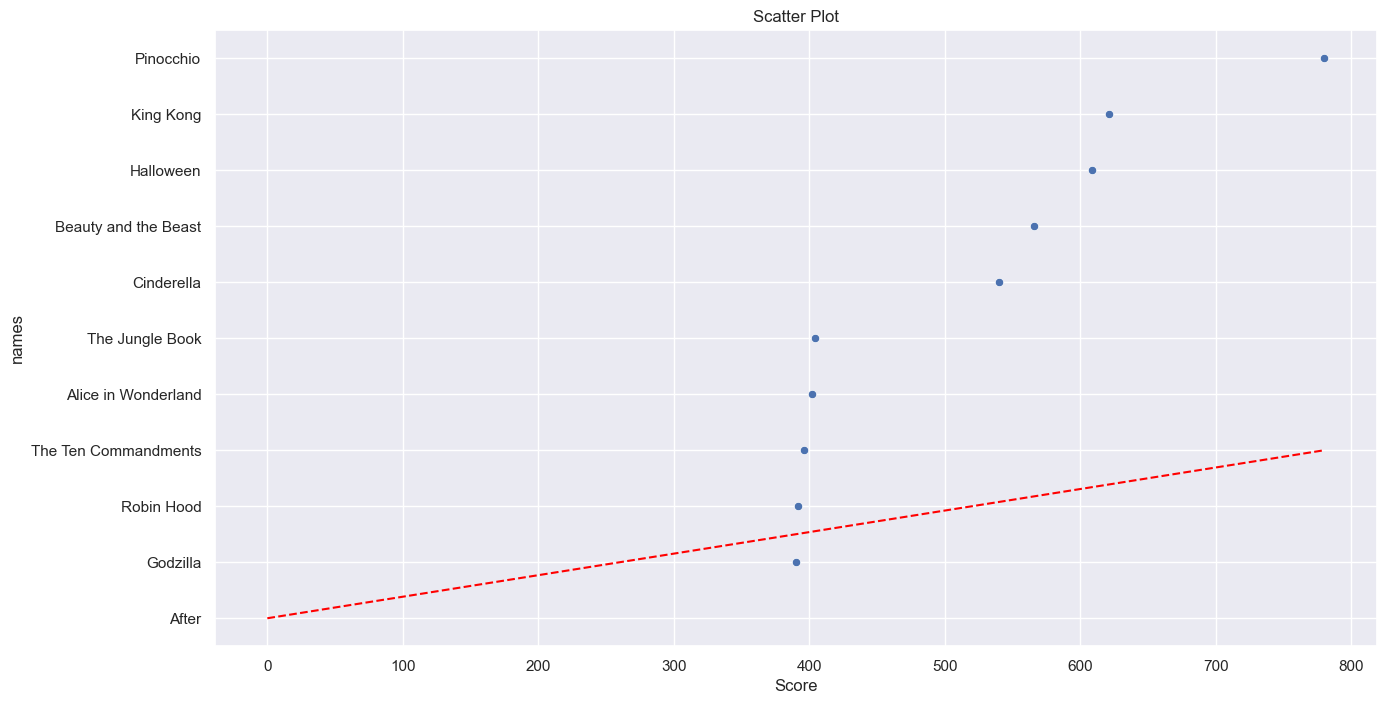

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=top.head(10)['score'], y = top.head(10)['names'].head(20))
plt.plot([min(top['score']), max(top['score'])], [min(top['names'].head(20)), max(top['names'].head(20))], color='red', linestyle='--', label='Diagonal Line')
plt.xlabel('Score')
plt.title('Scatter Plot')
plt.show()

* *The above plot shows how the rating is distributed and the highest score outlies evidently.*